In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

$x_i = \frac{i}{n} + \frac{1}{10} \sin \left( \frac{2 \pi i}{n} \right)$

In [10]:
n = 10
i = np.arange(n+1, dtype=np.float)
xs = i/n + np.sin(2*np.pi*i/n)/10

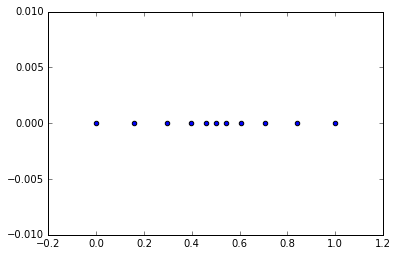

In [11]:
plt.scatter(xs, np.zeros(n+1))

In [59]:
def get_D(xs):
    n = len(xs)-1
    D = np.empty((n+1,n+1))
    for l in range(n+1):
        for i in range(n+1):
            if i == l:
                term = 0.0
                for k in range(n+1):
                    if k == i:
                        continue
                    term += 1.0/(xs[i] - xs[k])
                D[l,l] = term
            else:
                term = 1.0/(xs[i] - xs[l])
                for j in range(n+1):
                    if (j == l) or (j == i):
                        continue
                    term *= (xs[l] - xs[j])/(xs[i] - xs[j])    
                D[l,i] = term
    return D

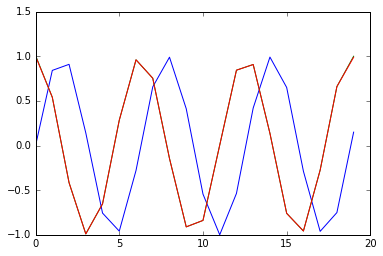

In [62]:
xs = np.arange(20, dtype=np.float)
D = get_D(xs)
ys = np.sin(xs)
plt.plot(ys)
plt.plot(np.dot(D, ys))
plt.plot(np.cos(xs))

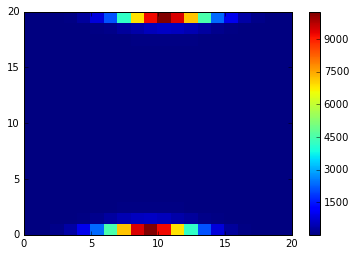

In [64]:
a = plt.pcolormesh(np.abs(get_D(np.arange(20, dtype=np.float))))
plt.colorbar(a)

In [71]:
n = 20
xs = np.cos(np.pi*(1.0-np.arange(n+1, dtype=np.float)/n))

In [72]:
D = get_D(xs)

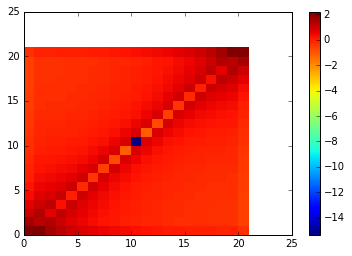

In [85]:
a = plt.pcolormesh(np.log(np.abs(D))/np.log(10))
plt.colorbar(a)

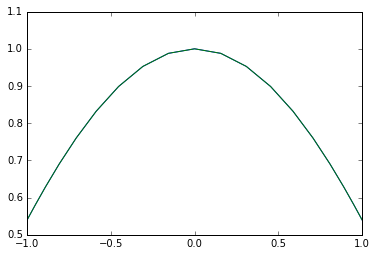

In [76]:
ys = np.sin(xs)
fprime_approx = np.dot(D, ys)
plt.plot(xs, fprime_approx)
plt.plot(xs, np.cos(xs))

In [88]:
nmax = 60
nmin = 2
errors = np.empty(nmax-nmin, dtype=np.float)
for n in range(nmin, nmax):
    xs = np.cos(np.pi*(1.0-np.arange(n, dtype=np.float)/(n-1)))
    errors[n-nmin] = np.linalg.norm(np.cos(xs)-np.dot(get_D(xs), np.sin(xs)))

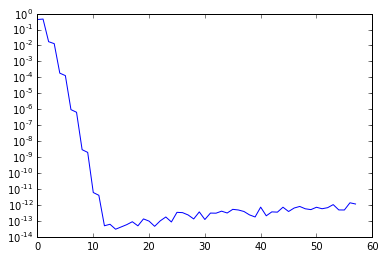

In [89]:
plt.semilogy(errors)

In [90]:
get_D([-2.0, -1.0, 0.0, 1.0, 2.0])

array([[-2.08333333,  4.        , -3.        ,  1.33333333, -0.25      ],
       [-0.25      , -0.83333333,  1.5       , -0.5       ,  0.08333333],
       [ 0.08333333, -0.66666667,  0.        ,  0.66666667, -0.08333333],
       [-0.08333333,  0.5       , -1.5       ,  0.83333333,  0.25      ],
       [ 0.25      , -1.33333333,  3.        , -4.        ,  2.08333333]])